# CREDIT SUISSE -  CASH FLOW

#### OBJECT ORIENTED PROGRAMMING - PART 2

01.04.2023

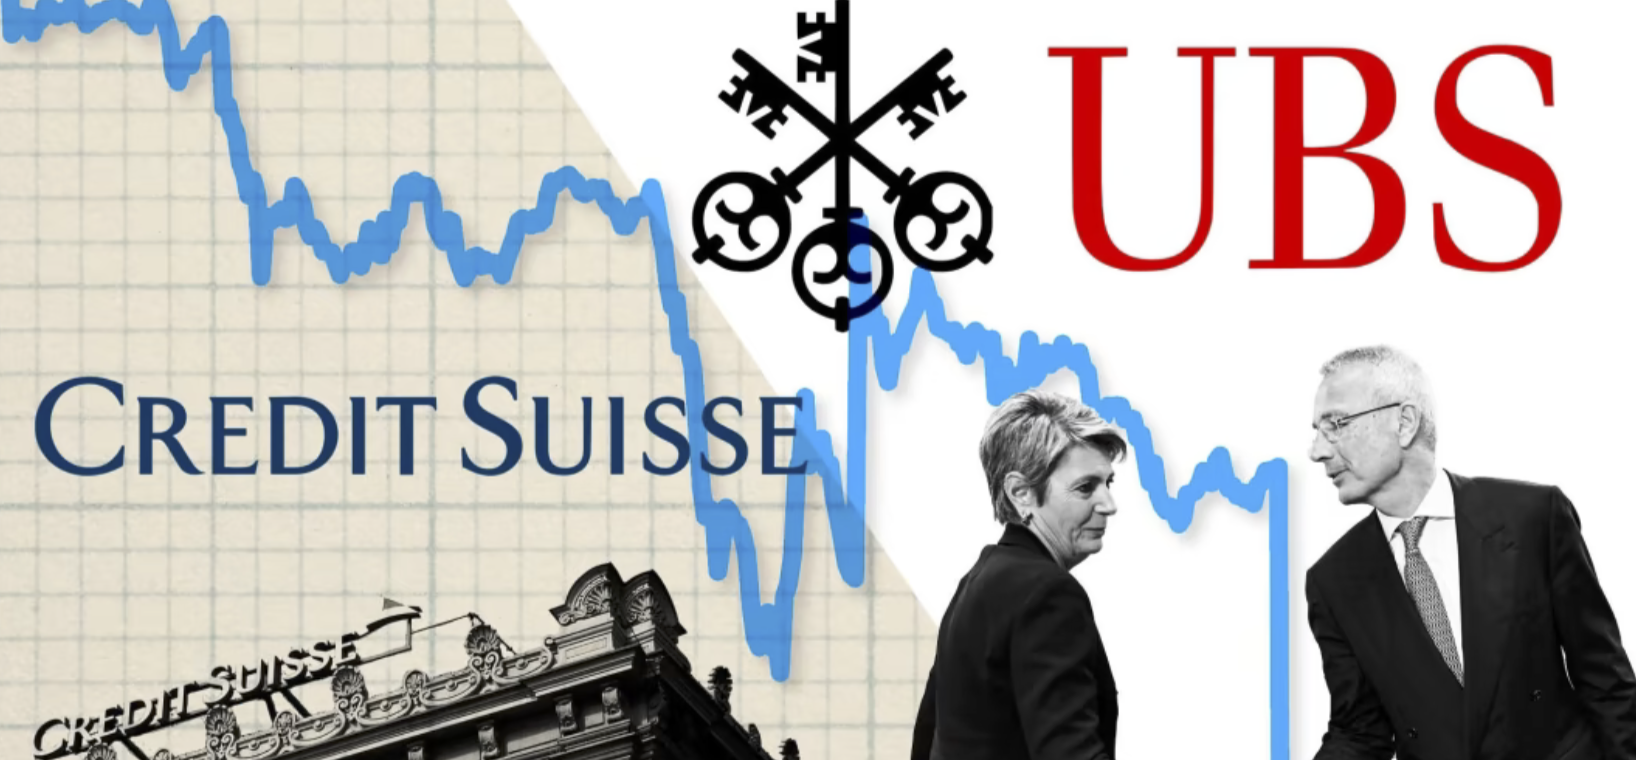

#### Hemant Thapa

Free cash flow is a measure of a company's financial performance that represents the amount of cash available for distribution after accounting for capital expenditures. It is calculated as operating cash flow minus capital expenditures. It is a useful metric for investors to assess a company's ability to generate cash after accounting for necessary investments in its operations. A positive free cash flow indicates that a company has cash available for paying dividends, repurchasing shares, paying off debt, or acquiring other businesses.

## IMPORTING LIBRARIES

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import yfinance as yf
import fundamentalanalysis as fa
import matplotlib.ticker as ticker

## STOCK PRICE DATA USING PYTHON CLASS

In [160]:
class Stock:
    def __init__(self, ticker):
        self.ticker = ticker
    def get_stock(self,ticker):
        stock = yf.Ticker(ticker).history(period="max")
        return stock

In [96]:
cs = Stock("CS").get_stock("CS")

In [97]:
cs.shape

(7019, 7)

In [98]:
cs.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-27 00:00:00-04:00,0.86,0.88,0.85,0.86,44575000,0.0,0.0
2023-03-28 00:00:00-04:00,0.85,0.86,0.84,0.85,51372800,0.0,0.0
2023-03-29 00:00:00-04:00,0.87,0.90,0.87,0.88,32200700,0.0,0.0
2023-03-30 00:00:00-04:00,0.90,0.90,0.87,0.87,19909000,0.0,0.0
2023-03-31 00:00:00-04:00,0.88,0.91,0.88,0.89,22234800,0.0,0.0


In [168]:
x = cs.index

In [169]:
y = cs.Close

## ENCAPSULATION

A class is a blueprint or a template that defines the properties and behaviors of a type of object. An object is an instance of a class, created from the class blueprint. Classes allow you to encapsulate data and behavior into objects, which can be used to create instances of that type of object.

Encapsulation refers to the idea of wrapping data and behavior into a single unit or object. In OOP, encapsulation is achieved by defining classes and objects. The properties and behavior of an object are encapsulated within the object, and can only be accessed or modified through the object's methods.

The Plot class encapsulates the properties x and y as instance variables, and the behavior of creating a line plot in the line_plot method. The x and y data are hidden within the object, and can only be accessed or modified through the line_plot method. This helps to maintain the integrity of the data, and provides a clear and concise interface for using the object.

In [178]:
#Plot class will plot graph through taking two argument x and y
#These instance variables represent the data that will be plotted on the line plot.
class Plot:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def line_plot(self, x,y):
        from matplotlib.ticker import FuncFormatter
        plt.style.use('dark_background')
        fig, ax = plt.subplots(figsize=(12, 6))
        plt.plot(x,y, color="royalblue", alpha=0.9)
        plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
        ax.grid(color='white', alpha=0.20)
        plt.show()
    def bar_plot(self, x,y):
        from matplotlib.ticker import FuncFormatter
        plt.style.use('dark_background')
        fig, ax = plt.subplots(figsize=(12, 6))
        plt.bar(x,y, color="royalblue", alpha=0.9)
        plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
        ax.grid(color='white', alpha=0.20)
        plt.show()

## CLOSE PRICE FOR 365DAYS

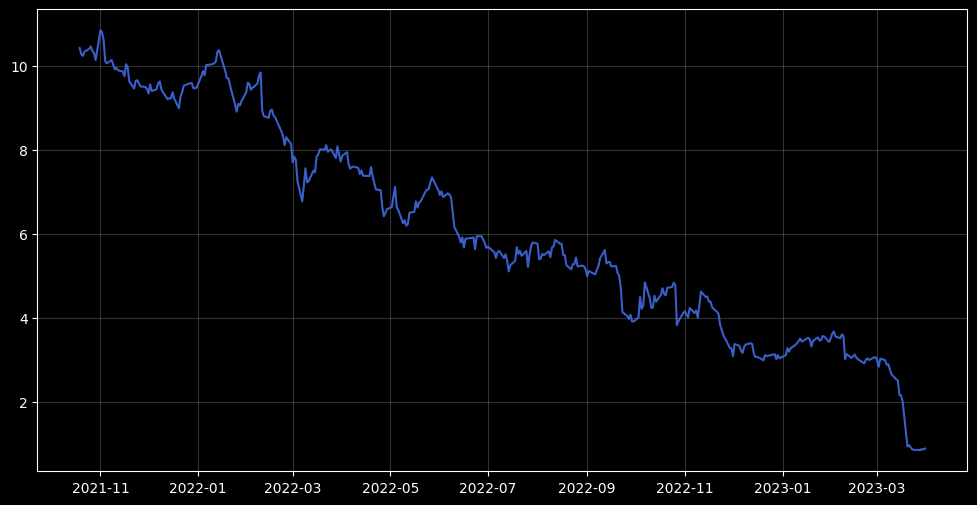

In [179]:
my_plot = Plot(x,y).line_plot(x[6654:],y[6654:])

## VOLUME FOR 365 DAYS

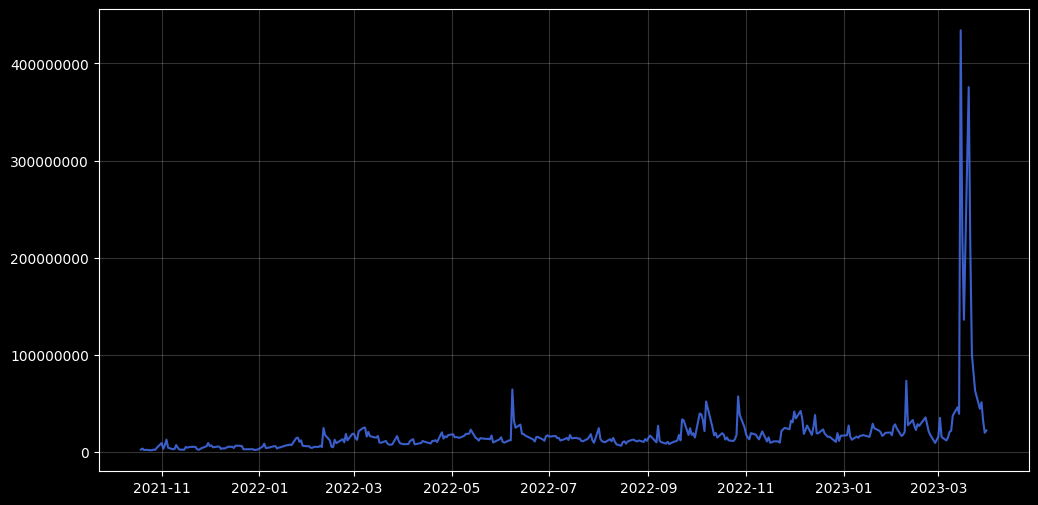

In [180]:
my_plot = Plot(x,y).line_plot(x = cs.index[6654:], y = cs.Volume[6654:])

## CREDIT SUISSE MOVING AVERAGE 

Moving averages can be useful for determining the trend direction and potential support and resistance levels. A 200-day moving average is often used as a long-term trend indicator, while a 40-day moving average is used for a short-term trend. A 3-day moving average can be used for intra-day trading. However, it's important to keep in mind that moving averages are just one of many technical indicators and should be used in conjunction with other analysis tools and market research. Additionally, different markets may require different moving average periods to be effective. Ultimately, it's up to the trader to determine what works best for their individual strategy.

In [381]:
class StockMovingAverageShort:
    def __init__(self, ticker):
        self.ticker = ticker
        
    def moving_average(self, ticker):
        stock = yf.Ticker(ticker).history(period="max")
        stock['Price_shift_1'] = stock['Close'].shift(-1)
        stock['Price_Difference'] = stock["Price_shift_1"] - stock['Close']
        stock['Return'] = stock['Price_Difference'] / stock['Close']
        stock['Direction'] = np.where(stock['Price_Difference'] > 0, 1, -1)
        stock['3-Day_Moving_Average'] = (stock['Close'] + stock['Close'].shift(1) + stock['Close'].shift(2))/3
        stock['40-Day_Moving_Average'] = stock['Close'].rolling(40).mean()
        stock['200-Day_Moving_Average'] = stock['Close'].rolling(200).mean()
        return stock

In [382]:
obj = StockMovingAverageShort("CS").moving_average("CS")

In [383]:
obj.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Price_shift_1', 'Price_Difference', 'Return', 'Direction',
       '3-Day_Moving_Average', '40-Day_Moving_Average',
       '200-Day_Moving_Average'],
      dtype='object')

## 3, 40 AND 200 DAY MOVING AVERAGE

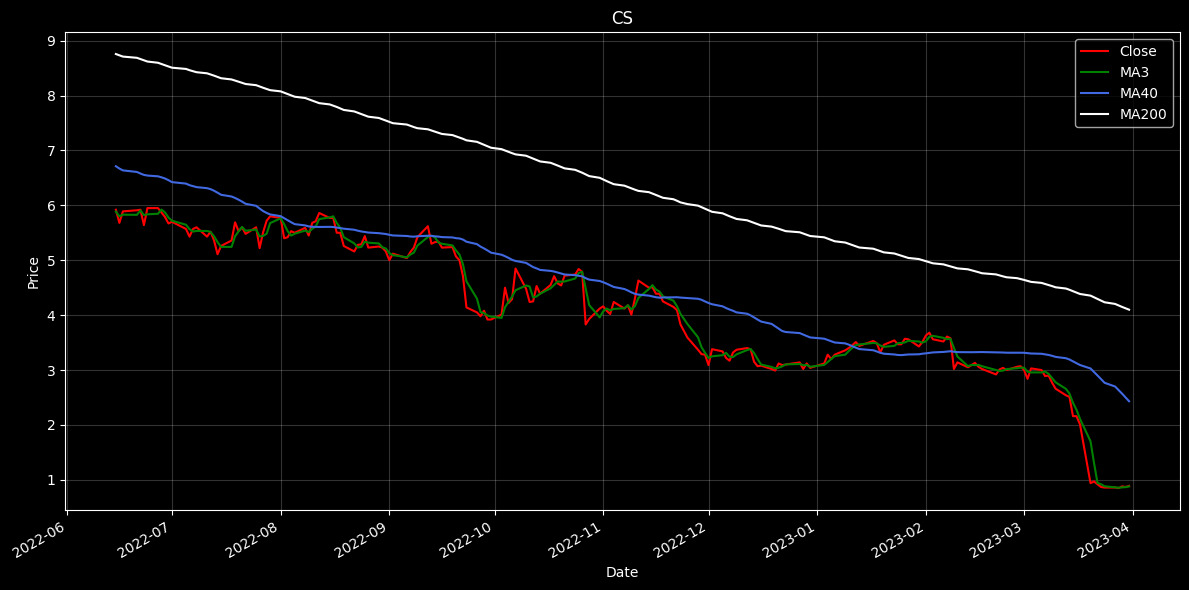

In [385]:
fig, ax = plt.subplots(figsize=(12, 6))
obj['Close'].tail(200).plot(label='Close', ax=ax, color="red")
obj['3-Day_Moving_Average'].tail(200).plot(label='MA3', ax=ax, color="green")
obj['40-Day_Moving_Average'].tail(200).plot(label='MA40', ax=ax, color="royalblue")
obj['200-Day_Moving_Average'].tail(200).plot(label='MA200', ax=ax, color="white")
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('CS')
ax.legend()
ax.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

## RETURN

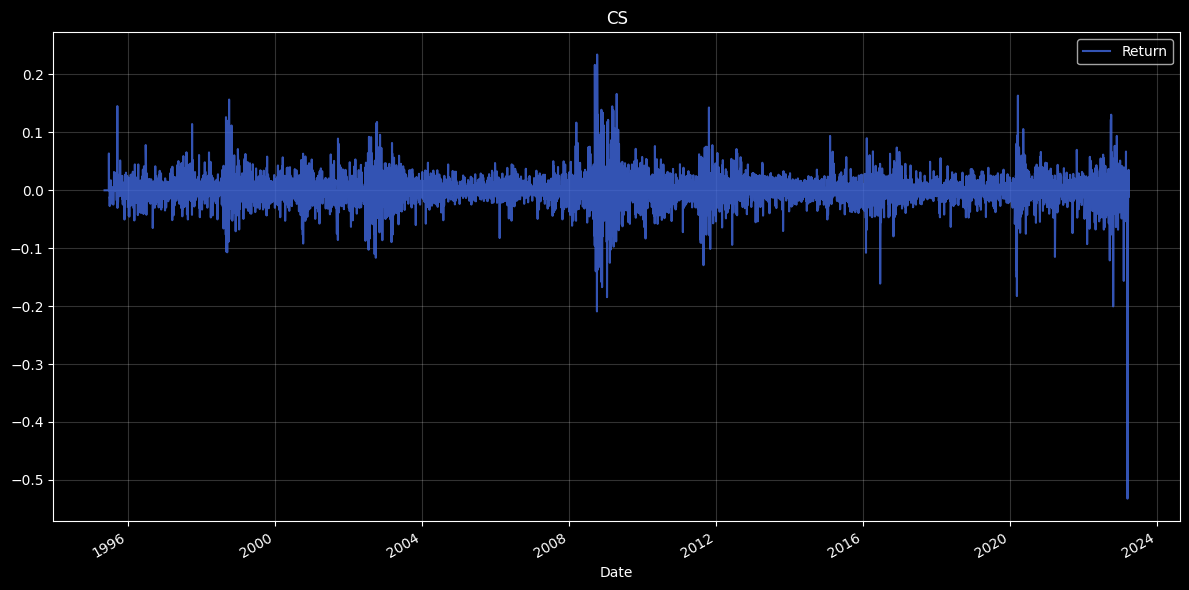

In [379]:
fig, ax = plt.subplots(figsize=(12, 6))
obj.Return.plot(color="royalblue", alpha=0.80)
ax.set_xlabel('Date')
ax.set_title('CS')
ax.legend()
ax.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

In [404]:
ticker = "CS"
api_key = "6eb8c70712a889b4f7efbf8d8ad902d4"

In [405]:
# Collect the Cash Flow Statements
cash_flow_statement_annually = fa.cash_flow_statement(ticker, api_key, period="annual")

In [407]:
cash_flow_statement_annually.to_csv('cash_flow_statement_annually.csv')

In [409]:
cash_flow_statement_annually.columns

Index(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005',
       '2004', '2003', '2002', '2001', '2000'],
      dtype='object')

In [410]:
class CashFlow:
    def __init__(self, data):
        self.data = data
    def DataSeparator(self, data):
        x = data.index
        y = data.values
        return x,y

### 1. NET INCOME

Net cash in a company's cash flow statement refers to the amount of cash that is generated or used by a company in a specific period of time, such as a quarter or a year. It is calculated by subtracting all of the cash outflows from the cash inflows that the company has experienced during that time period.

The net cash figure is important because it shows the company's ability to generate cash, which is a crucial metric for investors and lenders. A positive net cash flow indicates that a company is generating more cash than it is using, which is generally seen as a good sign. A negative net cash flow, on the other hand, means that the company is using more cash than it is generating, which could be a cause for concern.

Net cash from operating activities is a subset of the overall net cash figure and represents the amount of cash generated from the company's normal business operations. Net cash from investing activities represents the amount of cash used or generated from the company's investments, such as buying or selling property, plant, and equipment. Net cash from financing activities represents the amount of cash generated or used from financing activities, such as issuing or repaying debt or issuing new stock.

In [411]:
net_income = cash_flow_statement_annually.iloc[6]

In [412]:
net_income

2022    -7306000000
2021    -1626000000
2020     2666000000
2019     3425000000
2018     2011000000
2017     -948000000
2016    -2707000000
2015    -2945000000
2014     2324000000
2013     2965000000
2012     1685000000
2011     2790000000
2010     5920000000
2009     6724000000
2008    -8218000000
2007     7760000000
2006    11327000000
2005     5890941000
2004     5620507200
2003      769518360
2002    -3311918920
2001     1592684580
2000     5795686400
Name: netIncome, dtype: object

In [413]:
net_income = net_income.sort_index(ascending=True)
net_income

2000     5795686400
2001     1592684580
2002    -3311918920
2003      769518360
2004     5620507200
2005     5890941000
2006    11327000000
2007     7760000000
2008    -8218000000
2009     6724000000
2010     5920000000
2011     2790000000
2012     1685000000
2013     2965000000
2014     2324000000
2015    -2945000000
2016    -2707000000
2017     -948000000
2018     2011000000
2019     3425000000
2020     2666000000
2021    -1626000000
2022    -7306000000
Name: netIncome, dtype: object

In [414]:
my_object = CashFlow(net_income).DataSeparator(net_income)
my_object

(Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
        '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
        '2018', '2019', '2020', '2021', '2022'],
       dtype='object'),
 array([5795686400, 1592684580, -3311918920, 769518360, 5620507200,
        5890941000, 11327000000, 7760000000, -8218000000, 6724000000,
        5920000000, 2790000000, 1685000000, 2965000000, 2324000000,
        -2945000000, -2707000000, -948000000, 2011000000, 3425000000,
        2666000000, -1626000000, -7306000000], dtype=object))

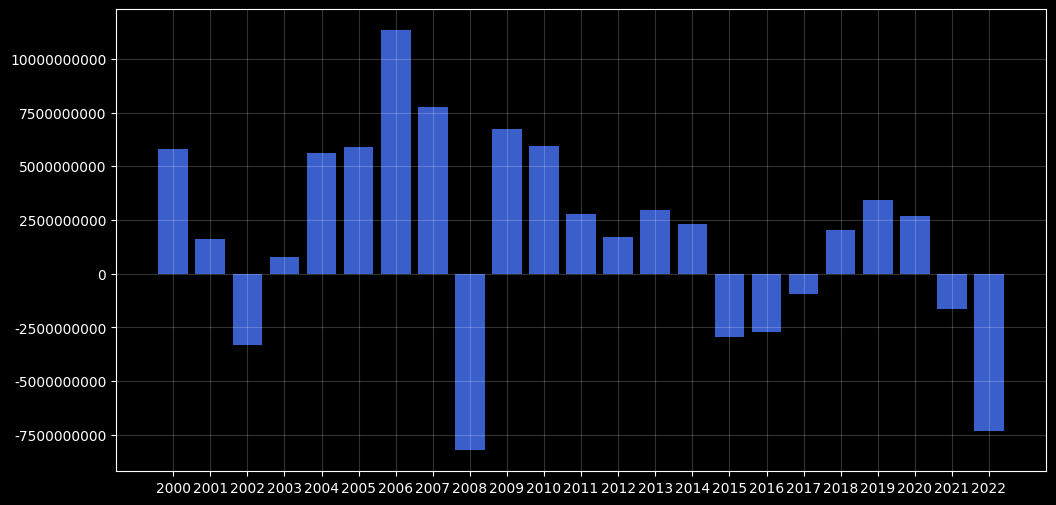

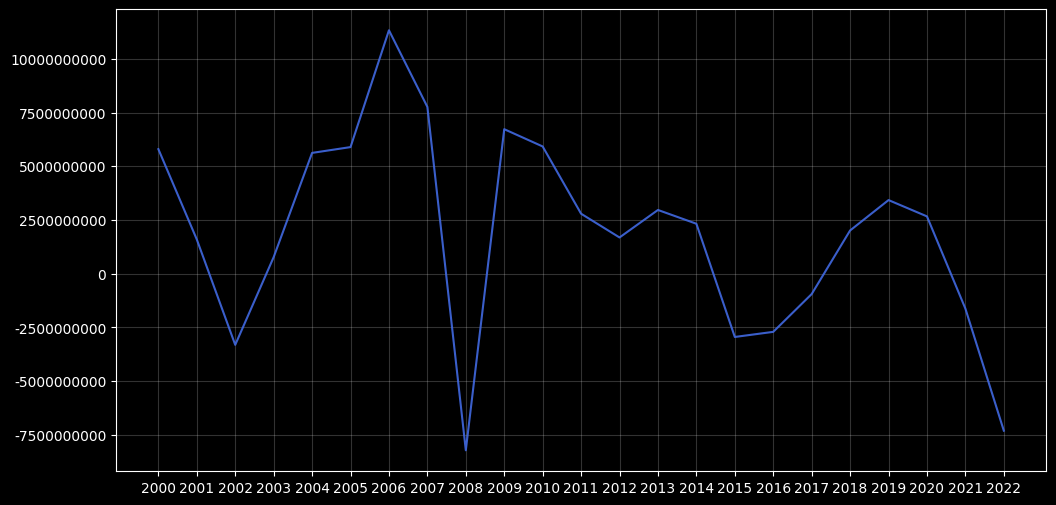

In [415]:
my_plot = Plot(x,y).bar_plot(my_object[0],my_object[1])
my_plot = Plot(x,y).line_plot(my_object[0],my_object[1])

Abve graph represent time series data of net income from the cash flow statement of a company. The values represent the net income in a specific year, ranging from 2000 to 2022. It can be observed that the net income varies over time, with some years showing a positive net income and others showing a negative net income. A positive net income indicates that the company has generated more cash from its operations than it has spent, while a negative net income indicates the opposite.

#### The financial crisis of 2008 was a difficult time, and a short analysis of the cash flow shows that it is still in a negative direction. There is a noticeable downward trend from 2020 to 2022.

## 2. CHANGE IN WORKING CAPITAL

Working capital is the difference between a company's current assets and current liabilities. It represents the amount of funds available to a company to fund its day-to-day operations. In the given data, the net change in working capital over the years has been recorded. 

The trend of working capital over the years has been fluctuating, with some years having a positive change and others having a negative change. This can be used to determine the company's ability to manage its short-term financial obligations and to fund its operations. The net change in working capital can provide insight into the company's liquidity and financial health, as a positive change in working capital indicates the company's ability to generate funds from its operations, while a negative change indicates the company's need for external funding.

In [416]:
changeInWorkingCapital = cash_flow_statement_annually.iloc[10]

In [226]:
changeInWorkingCapital

2022     -6024000000
2021      2086000000
2020     -7021000000
2019     -3807000000
2018    -10841000000
2017    -17528000000
2016      8356000000
2015    -11410000000
2014    -17814000000
2013      3090000000
2012     -5913000000
2011     -1889000000
2010      8413000000
2009    -13804000000
2008     29420000000
2007     -3329000000
2006    -33232000000
2005    -24743796000
2004     -7805120400
2003    -76406605600
2002     -6369500160
2001     -3837073080
2000    -55823909100
Name: changeInWorkingCapital, dtype: object

In [227]:
changeInWorkingCapital = changeInWorkingCapital.sort_index(ascending=True)
changeInWorkingCapital

2000    -55823909100
2001     -3837073080
2002     -6369500160
2003    -76406605600
2004     -7805120400
2005    -24743796000
2006    -33232000000
2007     -3329000000
2008     29420000000
2009    -13804000000
2010      8413000000
2011     -1889000000
2012     -5913000000
2013      3090000000
2014    -17814000000
2015    -11410000000
2016      8356000000
2017    -17528000000
2018    -10841000000
2019     -3807000000
2020     -7021000000
2021      2086000000
2022     -6024000000
Name: changeInWorkingCapital, dtype: object

In [228]:
my_object2 = CashFlow(changeInWorkingCapital).DataSeparator(changeInWorkingCapital)
my_object2

(Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
        '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
        '2018', '2019', '2020', '2021', '2022'],
       dtype='object'),
 array([-55823909100, -3837073080, -6369500160, -76406605600, -7805120400,
        -24743796000, -33232000000, -3329000000, 29420000000, -13804000000,
        8413000000, -1889000000, -5913000000, 3090000000, -17814000000,
        -11410000000, 8356000000, -17528000000, -10841000000, -3807000000,
        -7021000000, 2086000000, -6024000000], dtype=object))

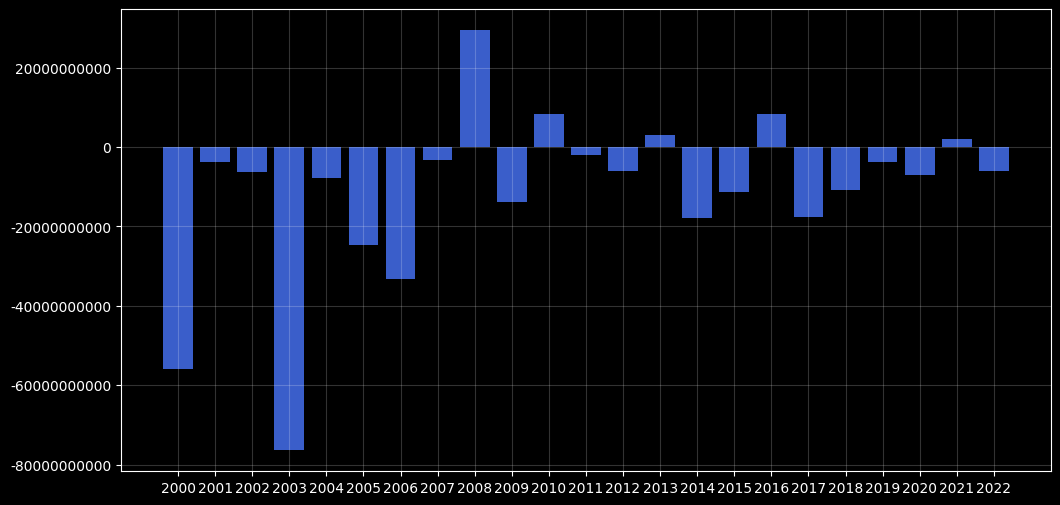

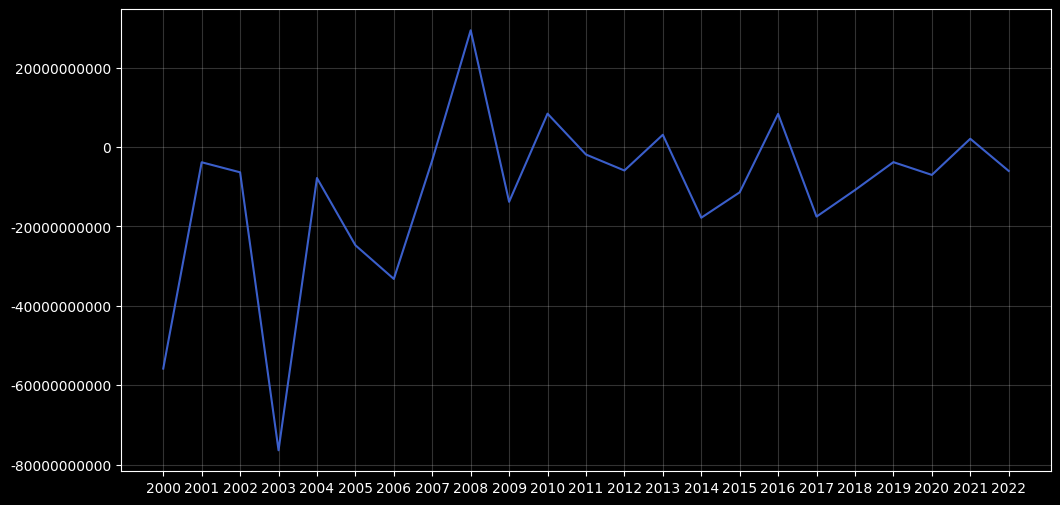

In [229]:
my_plot = Plot(x,y).bar_plot(my_object2[0],my_object2[1])
my_plot = Plot(x,y).line_plot(my_object2[0],my_object2[1])

The analysis of the working capital shows that there have been both positive and negative values over the years from 2000 to 2022. In some years, the working capital has been positive, indicating that the company has enough short-term assets to cover its short-term liabilities. In other years, the working capital has been negative, indicating that the company does not have enough short-term assets to cover its short-term liabilities. This could mean that the company may have difficulty paying its short-term obligations if it does not receive enough cash in time. It is important for the company to have a positive working capital to maintain financial stability and avoid potential liquidity problems.

#### we can see that the company's change in working capital has been mostly negative, indicating that the company has decreased its working capital over the years. However, there are some years (2008, 2016, 2021) where the change in working capital is positive, indicating that the company has increased its working capital during those years. 

## 3. NET CASH PROVIDED BY OPERATING ACTIVITIES

Net Cash Provided by Operating Activities is a measure of the cash that a company generates from its normal business operations. It's a line item on a company's cash flow statement, and it reflects the cash inflows and outflows that result from operating activities. Positive net cash provided by operating activities indicates that a company is generating more cash than it is using in its operations, while negative net cash provided by operating activities indicates that a company is using more cash than it is generating from operations.

In [240]:
netCashProvidedByOperatingActivities = cash_flow_statement_annually.iloc[16]
netCashProvidedByOperatingActivities.sort_index(ascending=True, inplace=True)
netCashProvidedByOperatingActivities

2000    -50204486600
2001      4385701380
2002     57545282370
2003    -11289986760
2004    -47261491200
2005    -21027222000
2006    -48545000000
2007    -57893000000
2008    129871000000
2009    -14186000000
2010      8228000000
2011     38630000000
2012    -12674000000
2013     22074000000
2014    -17620000000
2015     15068000000
2016     26775000000
2017     -8542000000
2018     12760000000
2019    -18424000000
2020     -6514000000
2021     36938000000
2022     13820000000
Name: netCashProvidedByOperatingActivities, dtype: object

In [241]:
my_object3 = CashFlow(netCashProvidedByOperatingActivities).DataSeparator(netCashProvidedByOperatingActivities)
my_object3

(Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
        '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
        '2018', '2019', '2020', '2021', '2022'],
       dtype='object'),
 array([-50204486600, 4385701380, 57545282370, -11289986760, -47261491200,
        -21027222000, -48545000000, -57893000000, 129871000000,
        -14186000000, 8228000000, 38630000000, -12674000000, 22074000000,
        -17620000000, 15068000000, 26775000000, -8542000000, 12760000000,
        -18424000000, -6514000000, 36938000000, 13820000000], dtype=object))

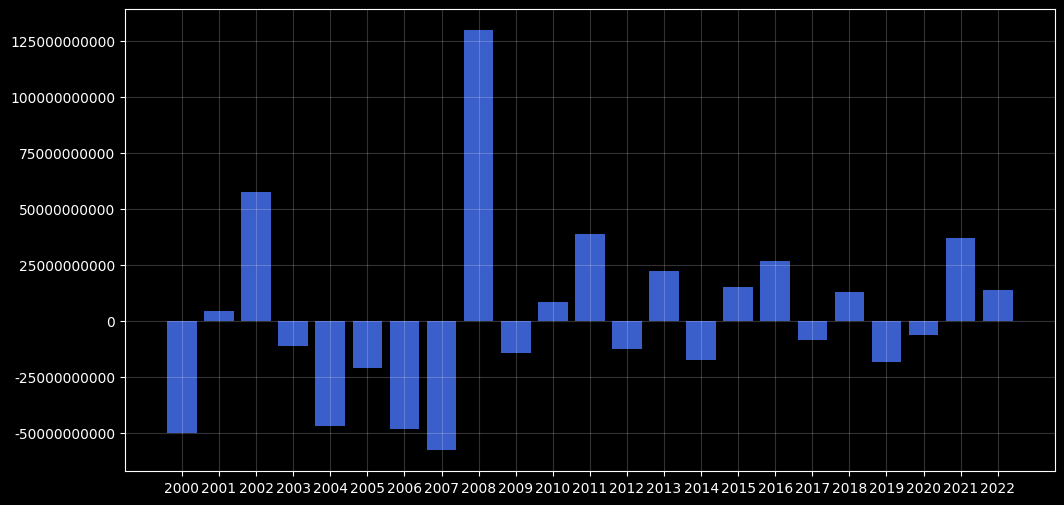

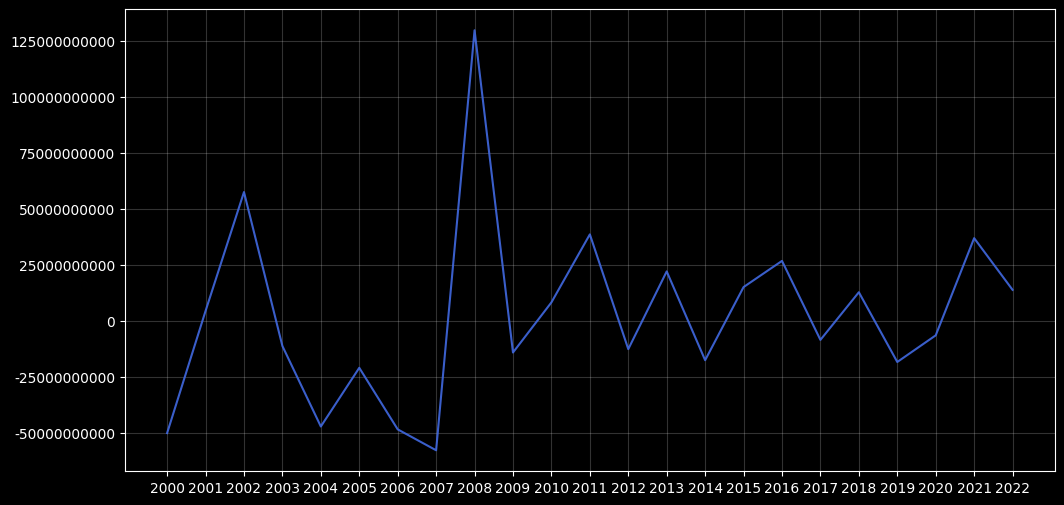

In [242]:
my_plot = Plot(x,y).bar_plot(my_object3[0],my_object3[1])
my_plot = Plot(x,y).line_plot(my_object3[0],my_object3[1])

The net cash provided by operating activities for a certain period of time. This information is important because it gives us an idea of the company's ability to generate cash from its core business operations. A positive number indicates that the company has generated more cash from its operations than it has used, while a negative number indicates that the company has used more cash from its operations than it has generated.

An analogy for this situation could be that the company is like a person who earns a salary. A positive number would mean that the person is earning more money than they are spending, while a negative number would mean that the person is spending more money than they are earning. This information can be used to assess the financial health of the company, as a company that consistently generates positive net cash from its operations is generally seen as being in a better financial position than a company that consistently generates negative net cash from its operations.

the net cash provided by operating activities for a company over a period of 23 years, from 2000 to 2022. A positive number indicates that the company generated more cash from its operations than it used, while a negative number indicates the opposite.

Over the 23-year period, the company experienced both positive and negative net cash from its operations. For example, in 2002, the company generated a substantial amount of net cash from its operations, with a value of 57545282370. In contrast, in 2004, the company experienced a negative net cash from its operations, with a value of -47261491200.

## 4. NET CASH USED FOR INVESTING ACTIVITIES

Net cash used for investing activities is a metric used to measure the amount of cash used by a company for investing activities such as buying property, plant, equipment, or acquiring other companies. This metric is typically found in a company's cash flow statement and is used to understand the company's ability to generate cash and its overall financial health.

In [249]:
netCashUsedForInvestingActivites = cash_flow_statement_annually.iloc[22]
netCashUsedForInvestingActivites.sort_index(ascending=True, inplace=True)
netCashUsedForInvestingActivites

2000    -152785225100
2001     -20869488030
2002    -110381170850
2003     -37964144920
2004     -40659788400
2005     -80238225000
2006     -16046000000
2007     -28483000000
2008       5825000000
2009      62071000000
2010     -21449000000
2011     -25972000000
2012      42955000000
2013      11519000000
2014     -10339000000
2015      34661000000
2016      -7953000000
2017      10814000000
2018      -7392000000
2019      -1326000000
2020      16674000000
2021     -10082000000
2022      55542000000
Name: netCashUsedForInvestingActivites, dtype: object

In [250]:
my_object4 = CashFlow(netCashUsedForInvestingActivites).DataSeparator(netCashUsedForInvestingActivites)
my_object4

(Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
        '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
        '2018', '2019', '2020', '2021', '2022'],
       dtype='object'),
 array([-152785225100, -20869488030, -110381170850, -37964144920,
        -40659788400, -80238225000, -16046000000, -28483000000, 5825000000,
        62071000000, -21449000000, -25972000000, 42955000000, 11519000000,
        -10339000000, 34661000000, -7953000000, 10814000000, -7392000000,
        -1326000000, 16674000000, -10082000000, 55542000000], dtype=object))

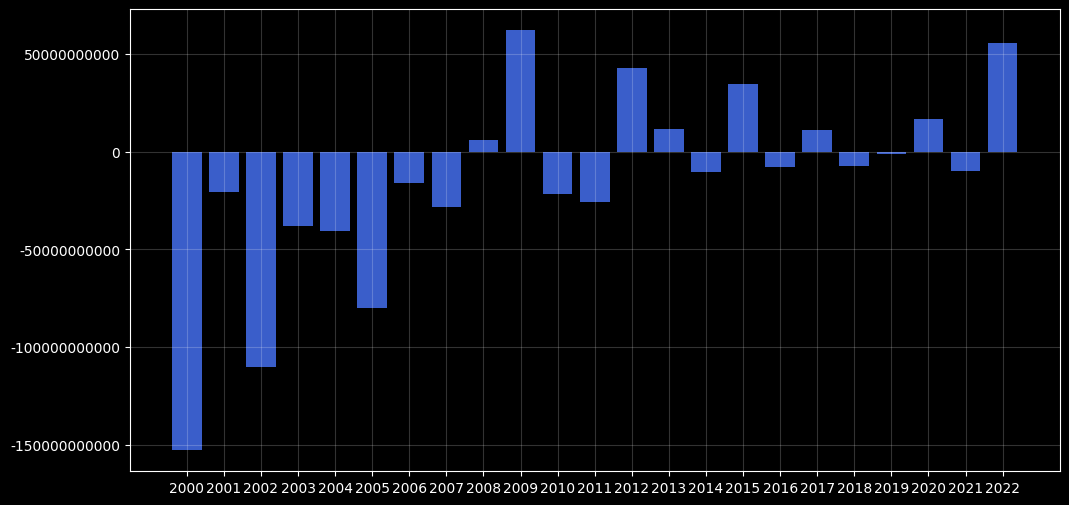

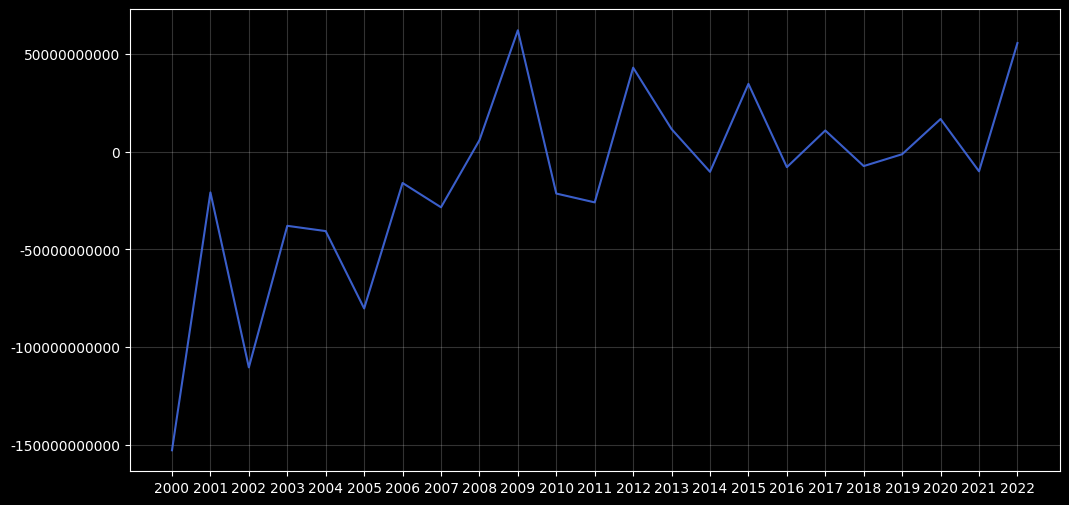

In [251]:
my_plot = Plot(x,y).bar_plot(my_object4[0],my_object4[1])
my_plot = Plot(x,y).line_plot(my_object4[0],my_object4[1])

The net cash used for investment activities of a company from 2000 to 2022. In 2000, the company used -152785225100 in investment activities, which was negative. From 2001 to 2004, the company continued to have negative cash used for investment activities, ranging from -20869488030 to -40659788400. The company had a positive year in 2008 with 5825000000 used for investment activities. From 2009 to 2021, the company had a mix of positive and negative years for net cash used for investment activities, with the highest positive year being in 2020 with 16674000000. In 2022, the company had a positive year with 55542000000 used for investment activities.

## 5. DEBT REPAYMENT

Debt repayment refers to the payment made by a company to repay its outstanding debt. This could include repaying the principal amount of a loan, paying interest on a loan, or making a payment on a bond. Debt repayment is an important part of a company's financial management and its ability to maintain good credit and access to capital. By making timely debt repayments, a company can demonstrate its financial stability and reduce its overall debt burden.

In [258]:
debtRepayment = cash_flow_statement_annually.iloc[23]
debtRepayment.sort_index(ascending=True, inplace=True)
debtRepayment

2000    -12341707200
2001    -23587691880
2002    -26827096160
2003    -26239213000
2004    -16983458800
2005    -35880348000
2006    -51295000000
2007    -65306000000
2008    -86569000000
2009    -72472000000
2010    -51390000000
2011    -37127000000
2012    -55936000000
2013    -55135000000
2014    -36471000000
2015    -49365000000
2016    -47132000000
2017    -62554000000
2018    -43851000000
2019    -46290000000
2020    -42768000000
2021    -52965000000
2022    -49644000000
Name: debtRepayment, dtype: object

In [259]:
my_object5 = CashFlow(debtRepayment).DataSeparator(debtRepayment)
my_object5

(Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
        '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
        '2018', '2019', '2020', '2021', '2022'],
       dtype='object'),
 array([-12341707200, -23587691880, -26827096160, -26239213000,
        -16983458800, -35880348000, -51295000000, -65306000000,
        -86569000000, -72472000000, -51390000000, -37127000000,
        -55936000000, -55135000000, -36471000000, -49365000000,
        -47132000000, -62554000000, -43851000000, -46290000000,
        -42768000000, -52965000000, -49644000000], dtype=object))

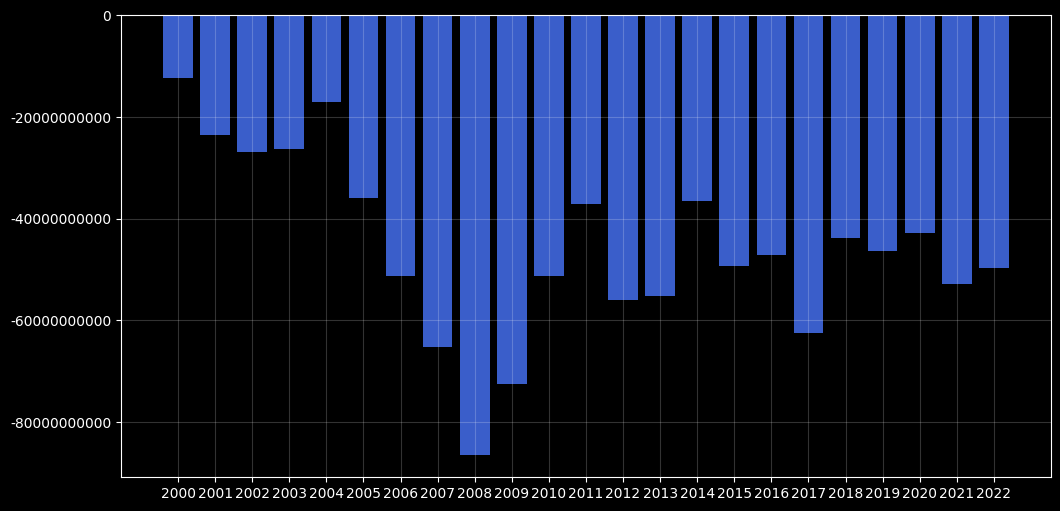

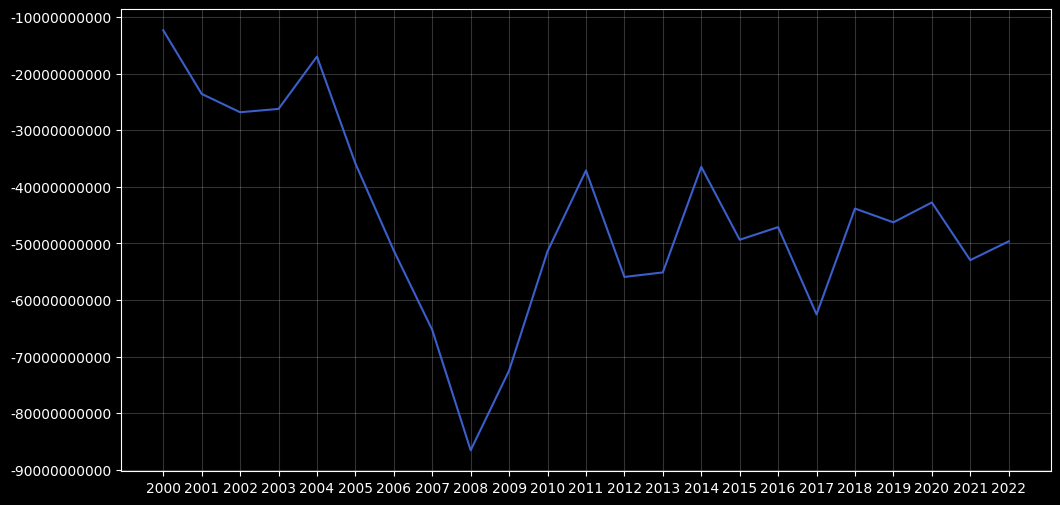

In [260]:
my_plot = Plot(x,y).bar_plot(my_object5[0],my_object5[1])
my_plot = Plot(x,y).line_plot(my_object5[0],my_object5[1])

Year 2000: The company had a negative debt repayment of CHF 12,341,707,200. This indicates that the company took on more debt during the year 2000.

Year 2001-2003: During this period, the company consistently had negative debt repayment, with the numbers increasing year over year. This suggests that the company was increasing its debt levels.

Year 2004-2010: The debt repayment numbers oscillated between negative and positive, indicating that the company was paying off some debt while also taking on new debt.

Year 2011-2022: The company consistently had negative debt repayment, with the numbers increasing over time. This suggests that the company was increasing its debt levels, possibly to finance its operations.

The trend of negative debt repayment suggests that the company was increasing its debt levels over time, which could be a cause for concern if the company is unable to pay off its debt obligations in the future.

## 6. COMMON STOCK ISSUED

Common stock issued refers to the amount of new shares that a company has issued and sold to investors. This can include the issuance of new shares through an initial public offering (IPO) or subsequent offerings, such as secondary offerings. The proceeds from the sale of common stock can be used by the company to finance operations, pay off debt, or invest in growth initiatives. The amount of common stock issued can have a significant impact on a company's capital structure and its ability to raise capital in the future.

In [264]:
commonStockIssued = cash_flow_statement_annually.iloc[24]
commonStockIssued.sort_index(ascending=True, inplace=True)
commonStockIssued

2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006    17333000000
2007    36338000000
2008    29111000000
2009    17674000000
2010    24758000000
2011    12980000000
2012    10285000000
2013    10740000000
2014     9691000000
2015    24787000000
2016    16892000000
2017    16287000000
2018    11693000000
2019     9624000000
2020    12364000000
2021    20858000000
2022     3924000000
Name: commonStockIssued, dtype: object

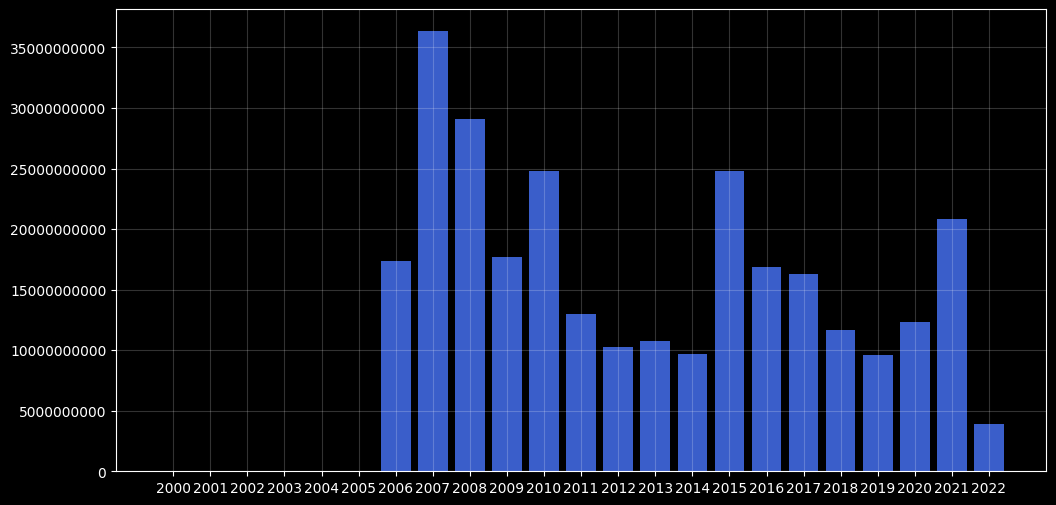

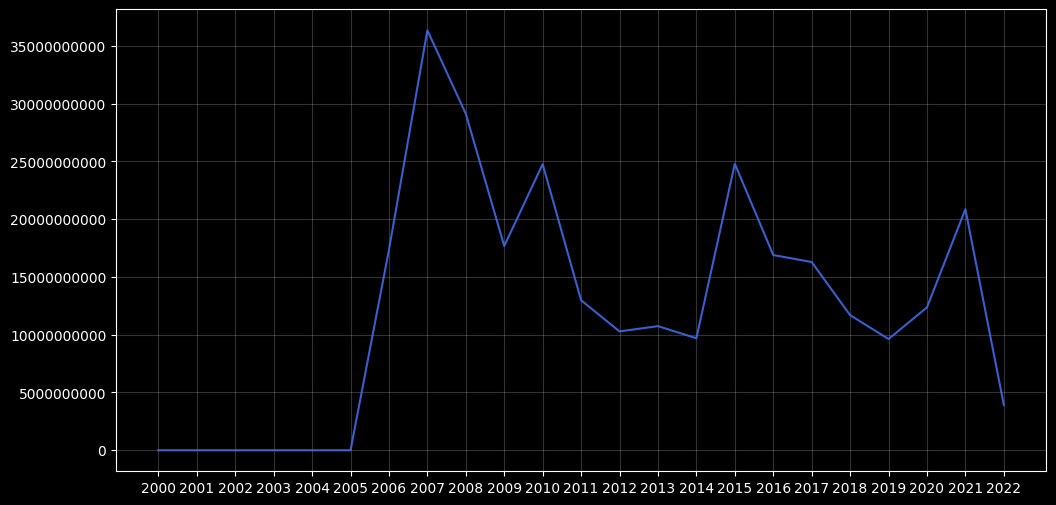

In [268]:
my_object6 = CashFlow(commonStockIssued).DataSeparator(commonStockIssued)
my_plot = Plot(x,y).bar_plot(my_object6[0],my_object6[1])
my_plot = Plot(x,y).line_plot(my_object6[0],my_object6[1])

The chart represents the common stock issued by the company for each year. It appears that the company has issued some common stock between 2006 and 2022, with the highest issuance in 2006 - 2007.

## 7. COMMON STOCK REPURCHASED

Common stock repurchased refers to the action taken by a company to buy back its own outstanding shares of common stock from the market or from shareholders. This reduces the number of outstanding shares, thereby increasing the ownership stake of each remaining shareholder and also increasing the earnings per share. Repurchasing common stock can be a signal to the market that a company believes its stock is undervalued, or it can be used as a way to return capital to shareholders.

In [273]:
commonStockRepurchased = cash_flow_statement_annually.iloc[25]
commonStockRepurchased.sort_index(ascending=True, inplace=True)
commonStockRepurchased 

2000               0
2001               0
2002               0
2003               0
2004               0
2005               0
2006    -23461000000
2007    -41879000000
2008    -25032000000
2009    -19019000000
2010    -26846000000
2011    -11790000000
2012     -8859000000
2013    -10202000000
2014    -10197000000
2015    -19761000000
2016    -16197000000
2017    -12757000000
2018    -12441000000
2019    -11536000000
2020    -13253000000
2021    -21915000000
2022      -229000000
Name: commonStockRepurchased, dtype: object

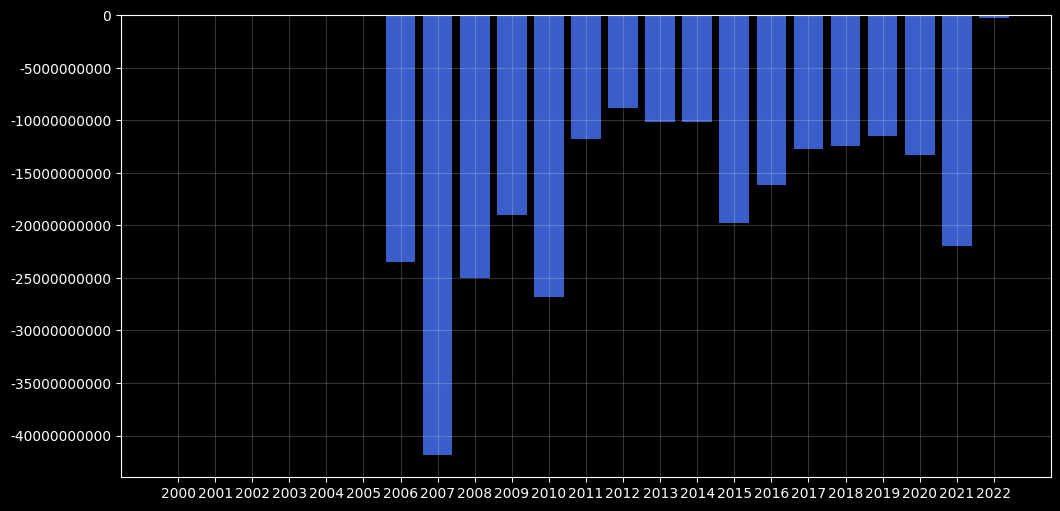

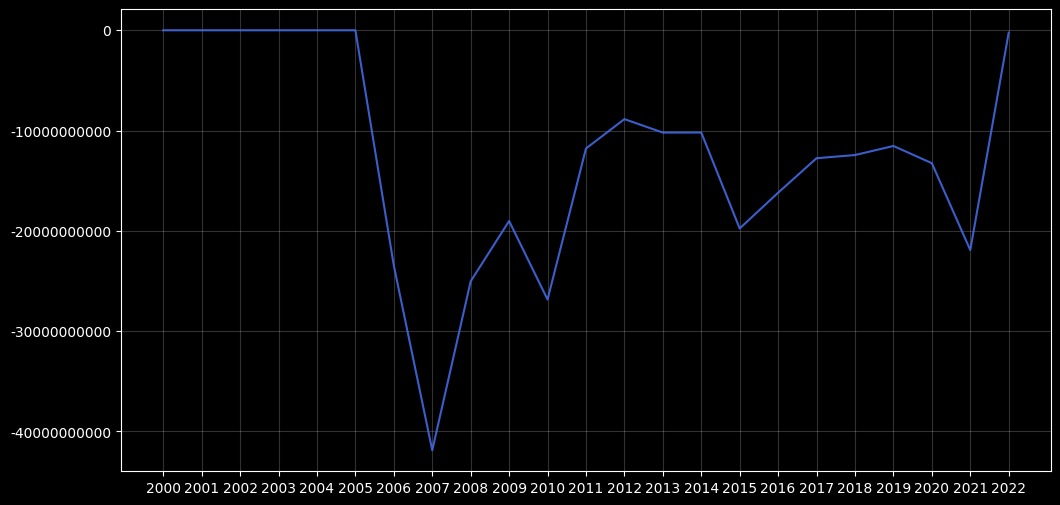

In [274]:
my_object7 = CashFlow(commonStockRepurchased).DataSeparator(commonStockRepurchased)
my_plot = Plot(x,y).bar_plot(my_object7[0],my_object7[1])
my_plot = Plot(x,y).line_plot(my_object7[0],my_object7[1])

The given chart is the common stock repurchased by the company over the years 2000 to 2022. The data shows that the company has been repurchasing its common stock in most of the years, with a few exceptions. In 2006, the company issued common stock. From 2007 to 2009, the company repurchased more common stock than it issued. From 2010 to 2015, the company issued more common stock than it repurchased. From 2016 to 2021, the company again repurchased more common stock than it issued.

The common stock repurchased by a company can impact its financial health and stock price. A company that repurchases its common stock can boost its earnings per share and increase demand for the stock, leading to a higher stock price. However, a company that consistently repurchases its common stock may also be seen as having limited growth potential, as it is not investing in its business for future growth.

## 8. DIVIDENDS PAID

In [275]:
dividendsPaid = cash_flow_statement_annually.iloc[26]
dividendsPaid.sort_index(ascending=True, inplace=True)
dividendsPaid 

2000    -1990650100
2001     -176226060
2002    -2550288150
2003     -272615200
2004     -608546400
2005    -1797705000
2006    -2346000000
2007    -2512000000
2008    -2946000000
2009     -375000000
2010    -2800000000
2011    -1948000000
2012    -1296000000
2013     -564000000
2014    -1252000000
2015     -427000000
2016     -493000000
2017     -590000000
2018     -666000000
2019     -696000000
2020     -716000000
2021     -257000000
2022     -280000000
Name: dividendsPaid, dtype: object

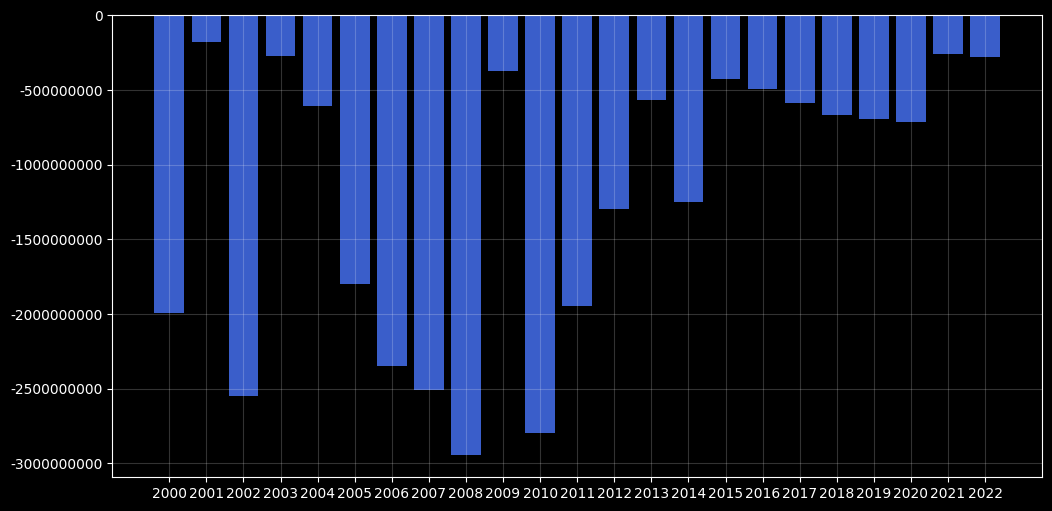

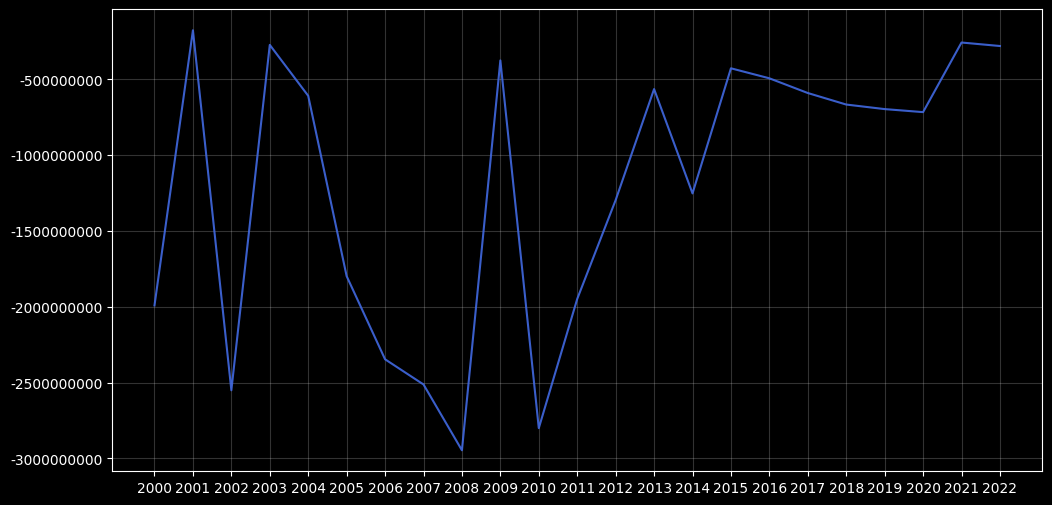

In [277]:
my_object8 = CashFlow(dividendsPaid).DataSeparator(dividendsPaid)
my_plot = Plot(x,y).bar_plot(my_object8[0],my_object8[1])
my_plot = Plot(x,y).line_plot(my_object8[0],my_object8[1])

The company has consistently paid dividends in most of the years, with a few exceptions such as in 2000 and 2002.

The amount of dividends paid has been relatively low in some years, but has increased in others. For example, in 2006 and 2007, the company paid significantly more dividends compared to other years.

In general, the company has been paying out a moderate amount of dividends over the years, with some fluctuations.

In some years, such as 2015 and 2016, the company paid out a lower amount of dividends compared to other years. This could be due to a variety of factors, such as a decrease in profits or a shift in the company's strategy towards reinvesting in the business.

The dividends paid data provides insight into the company's ability to generate profits and its willingness to distribute a portion of those profits to its shareholders.

## 9. NET CASH USED/PROVIDED BY FINANCING ACTIVITIES

Net cash used/provided by financing activities refers to the cash inflows and outflows generated from a company's financing activities. These activities include issuing or repaying debt, issuing new shares of stock (equity), repurchasing shares of stock, and paying dividends to shareholders. The net cash used or provided by financing activities is calculated by subtracting the cash outflows from financing activities (such as debt repayment or share repurchases) from the cash inflows (such as issuing debt or issuing new shares). This figure is important as it provides insight into how a company is financing its operations and growth.

In [279]:
netCashUsedProvidedByFinancingActivities = cash_flow_statement_annually.iloc[28]
netCashUsedProvidedByFinancingActivities.sort_index(ascending=True, inplace=True)
netCashUsedProvidedByFinancingActivities 

2000     202785957100
2001      26137982220
2002      52386650730
2003      48195889040
2004      91280820400
2005      99259656000
2006      59063000000
2007      97135000000
2008     -82030000000
2009     -84909000000
2010      33028000000
2011      33056000000
2012     -77860000000
2013     -24421000000
2014      33286000000
2015     -36168000000
2016       8767000000
2017     -12791000000
2018     -15146000000
2019      22189000000
2020      29740000000
2021        -47000000
2022    -163883000000
Name: netCashUsedProvidedByFinancingActivities, dtype: object

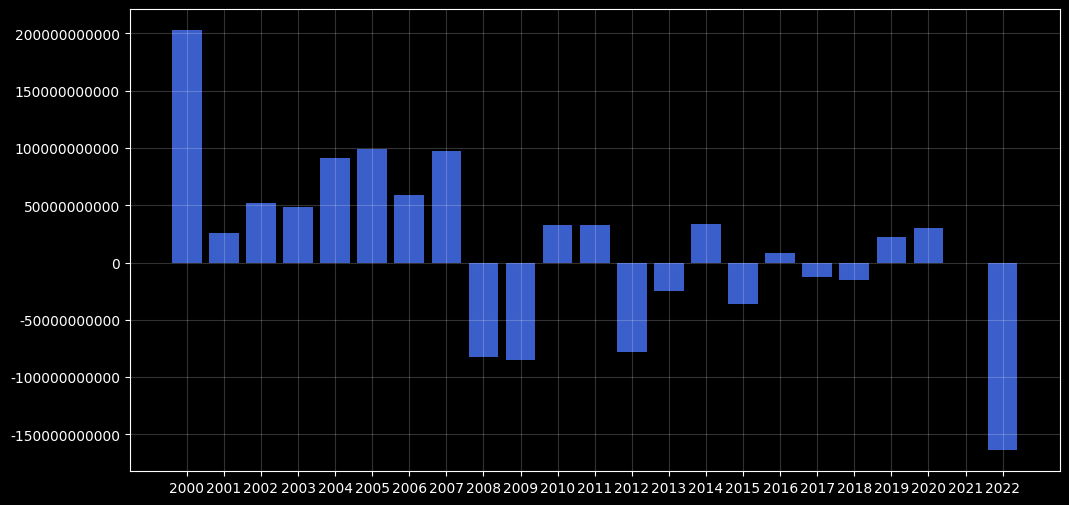

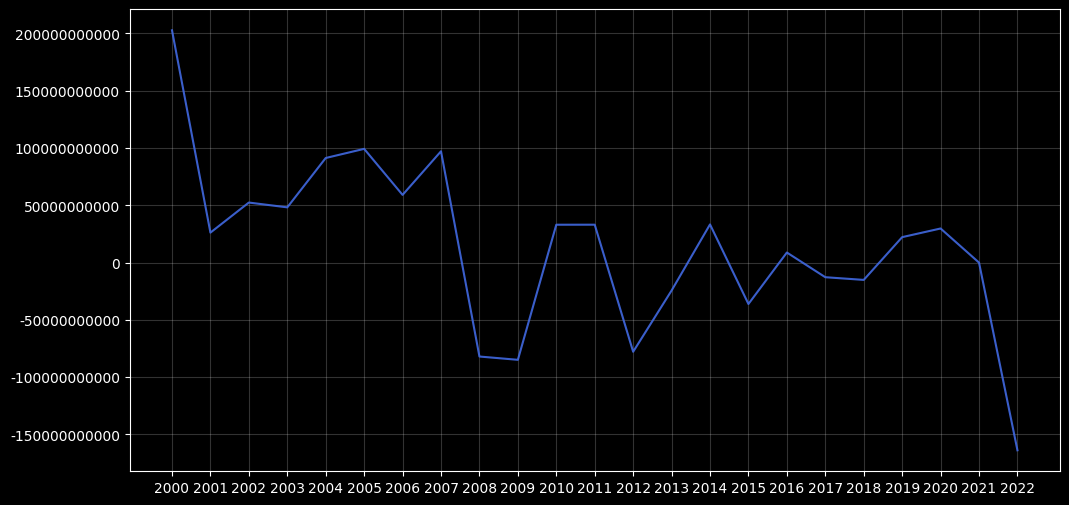

In [282]:
my_object9 = CashFlow(netCashUsedProvidedByFinancingActivities).DataSeparator(netCashUsedProvidedByFinancingActivities)
my_plot = Plot(x,y).bar_plot(my_object9[0],my_object9[1])
my_plot = Plot(x,y).line_plot(my_object9[0],my_object9[1])

The net cash used or provided by financing activities for a company over the years 2000 to 2022. The values represent the net change in cash due to activities such as issuing and repurchasing common stock, paying dividends, and repaying debt.

The pattern shows that in some years, the company used more cash from financing activities than it provided, and in other years, it provided more cash than it used. For example, in the years 2008, 2009, and 2022, the company used more cash from financing activities, whereas in the years 2001, 2002, 2004, and 2019, it provided more cash.

## 10. EFFECT OF FOREX CHANGES ON CASH

The effect of foreign exchange changes on cash refers to the impact that changes in foreign currency exchange rates have on a company's cash balance. If a company has cash balances in multiple currencies, changes in the exchange rates between those currencies and the company's reporting currency can impact the total value of its cash. For example, if a company has cash in euros and the value of the euro decreases relative to the reporting currency, the company's cash balance will decrease in value even though the amount of cash held in euros remains the same. The "effect of foreign exchange changes on cash" line item in a cash flow statement reflects the impact of these changes.

In [287]:
effectOfForexChangesOnCash = cash_flow_statement_annually.iloc[29]
effectOfForexChangesOnCash.sort_index(ascending=True, inplace=True)
effectOfForexChangesOnCash 

2000      -11319700
2001              0
2002      -92612090
2003    -2602236000
2004    -2511678400
2005     3937830000
2006     -515000000
2007    -1340000000
2008    -2072000000
2009    -1154000000
2010    -6155000000
2011     -633000000
2012    -1231000000
2013    -1216000000
2014     5790000000
2015     -582000000
2016     1244000000
2017     -827000000
2018       10000000
2019     -607000000
2020    -2667000000
2021    -1103000000
2022    -1819000000
Name: effectOfForexChangesOnCash, dtype: object

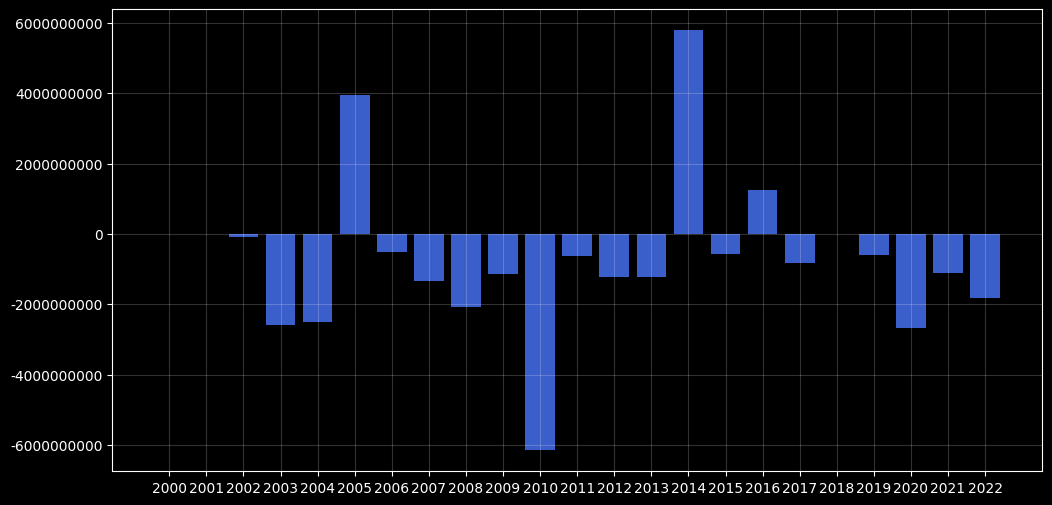

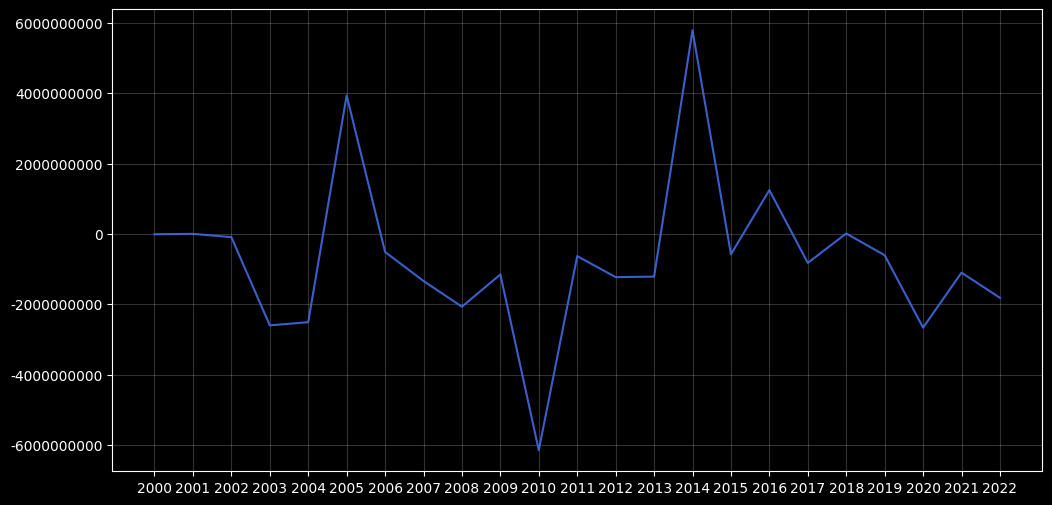

In [289]:
my_object10 = CashFlow(effectOfForexChangesOnCash).DataSeparator(effectOfForexChangesOnCash)
my_plot = Plot(x,y).bar_plot(my_object10[0],my_object10[1])
my_plot = Plot(x,y).line_plot(my_object10[0],my_object10[1])

The effect of foreign exchange changes on cash can be seen in the above data. For some years, the effect was negative and for others, it was positive. For instance, in the year 2003, there was a negative impact of 2602236000 on cash. On the other hand, in the year 2005, there was a positive impact of 3937830000 on cash due to foreign exchange changes. The fluctuations in the foreign exchange rate can have a significant impact on a company's cash position, and it's important for companies to manage their foreign currency exposure effectively.

## 11. NET CHANGE IN CASH

The net change in cash refers to the overall increase or decrease in a company's cash balance over a certain period of time. It is calculated as the difference between the starting cash balance and the ending cash balance. It includes all cash inflows and outflows, including cash received from operating activities, cash used for investing activities, cash received from financing activities, and any other cash transactions. The net change in cash can be a useful indicator of a company's financial stability and its ability to generate cash.

In [298]:
netchangeincash = cash_flow_statement_annually.iloc[30]
netchangeincash.sort_index(ascending=True, inplace=True)
netchangeincash 

2000      -213457200
2001      9652533060
2002      -541849840
2003     -3660478640
2004       847862400
2005      1933356000
2006      1463000000
2007      9419000000
2008     51576000000
2009    -38178000000
2010     13610000000
2011     45106000000
2012    -48810000000
2013      6929000000
2014     10657000000
2015     12979000000
2016     28833000000
2017    -11346000000
2018     -9768000000
2019      1832000000
2020     37233000000
2021     25706000000
2022    -96340000000
Name: netChangeInCash, dtype: object

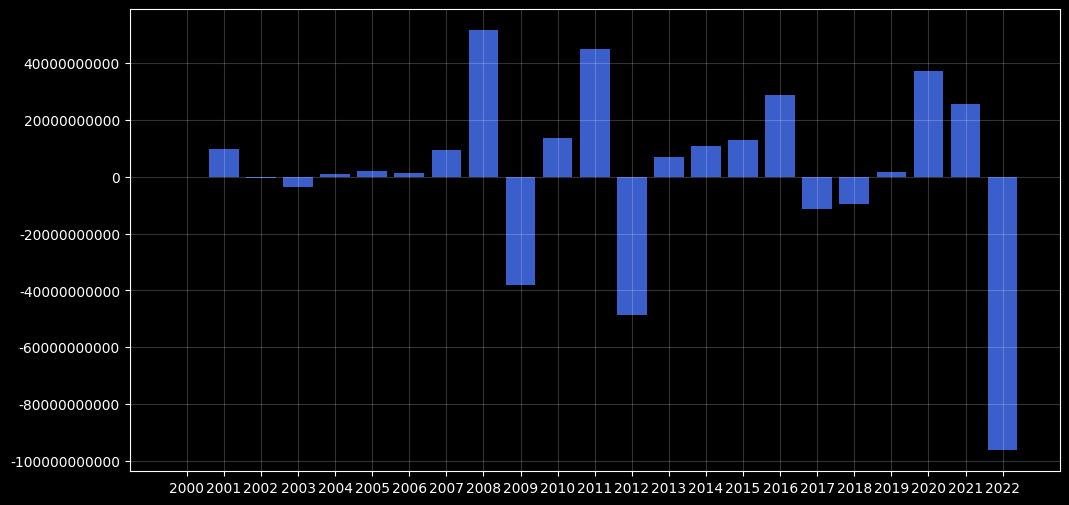

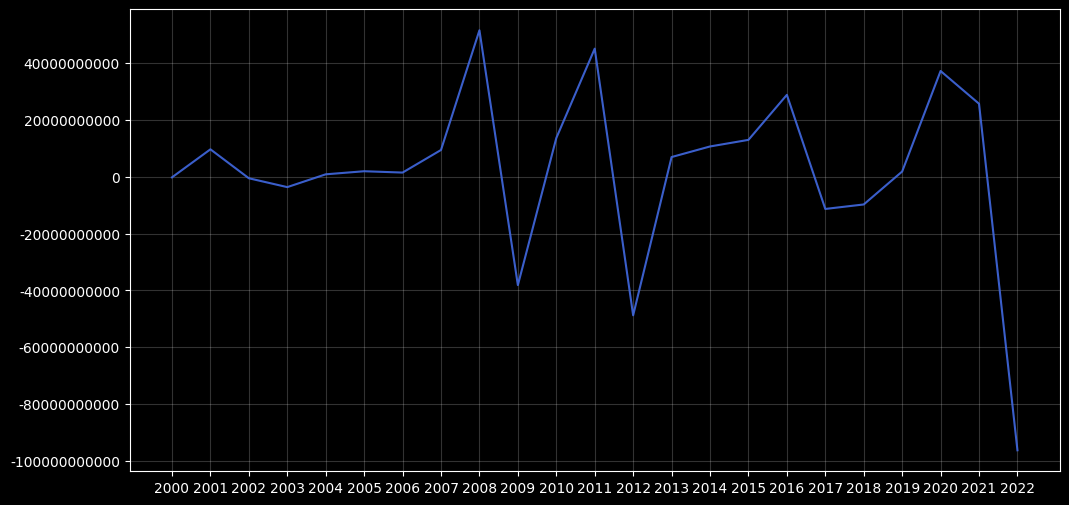

In [299]:
my_object11 = CashFlow(netchangeincash).DataSeparator(netchangeincash)
my_plot = Plot(x,y).bar_plot(my_object11[0],my_object11[1])
my_plot = Plot(x,y).line_plot(my_object11[0],my_object11[1])

The net change in cash chart shows the change in a company's cash balance from one period to another. A positive number indicates an increase in cash, while a negative number indicates a decrease.

2000, there was a decrease in cash of -213457200.

2001, there was a significant increase in cash of 9652533060.

2002, there was a decrease in cash of -541849840.

2003, there was a decrease in cash of -3660478640.

2004, there was an increase in cash of 847862400.

2008, there was an increase in cash of 51576000000.

2009,  there was a decrease in cash of  -38178000000.

2011, there was an increase in cash of  45106000000.

2012,  there was a decrease in cash of  -48810000000.

2016,  there was an increase in cash of 28833000000.

2020,  there was an increase in cash of 37233000000.

2022,  there was a decrease in cash of  -96340000000.

## 12. CASH AT END OF PERIOD

The cash at end of period is the amount of cash a company has at the end of a specific period, typically at the end of a quarter or a year. This information is usually found in a company's balance sheet or cash flow statement. The cash at end of period is an important metric for understanding a company's liquidity and its ability to meet its financial obligations.

In [301]:
cashAtEndOfPeriod = cash_flow_statement_annually.iloc[31]
cashAtEndOfPeriod.sort_index(ascending=True, inplace=True)
cashAtEndOfPeriod 

2000      2933419400
2001      3102243660
2002      2553052690
2003     24783200000
2004     25612510000
2005     27642513000
2006     29040000000
2007     38459000000
2008     90035000000
2009     51857000000
2010     65467000000
2011    110573000000
2012     61763000000
2013     68692000000
2014     79349000000
2015     92328000000
2016    121161000000
2017    109815000000
2018    100047000000
2019    101879000000
2020    139112000000
2021    164818000000
2022     68478000000
Name: cashAtEndOfPeriod, dtype: object

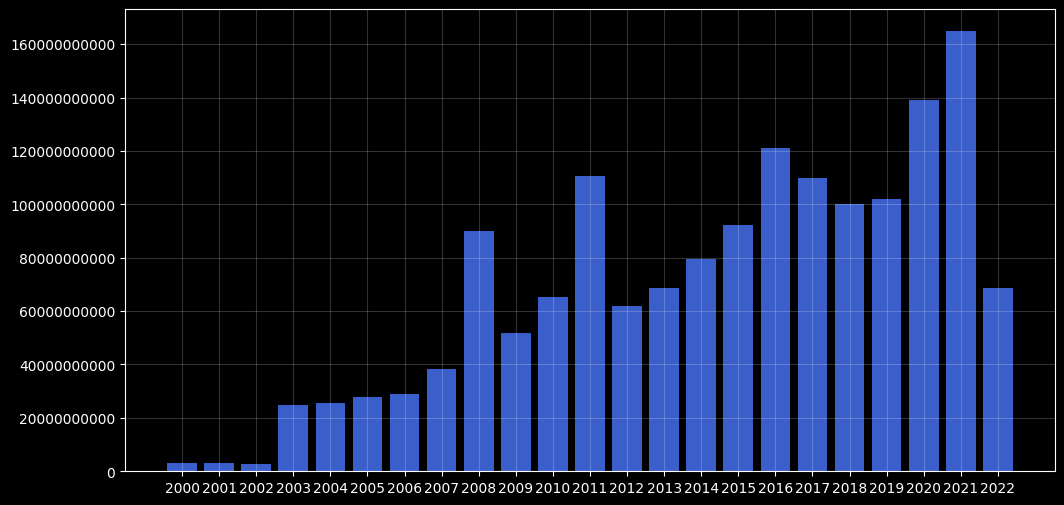

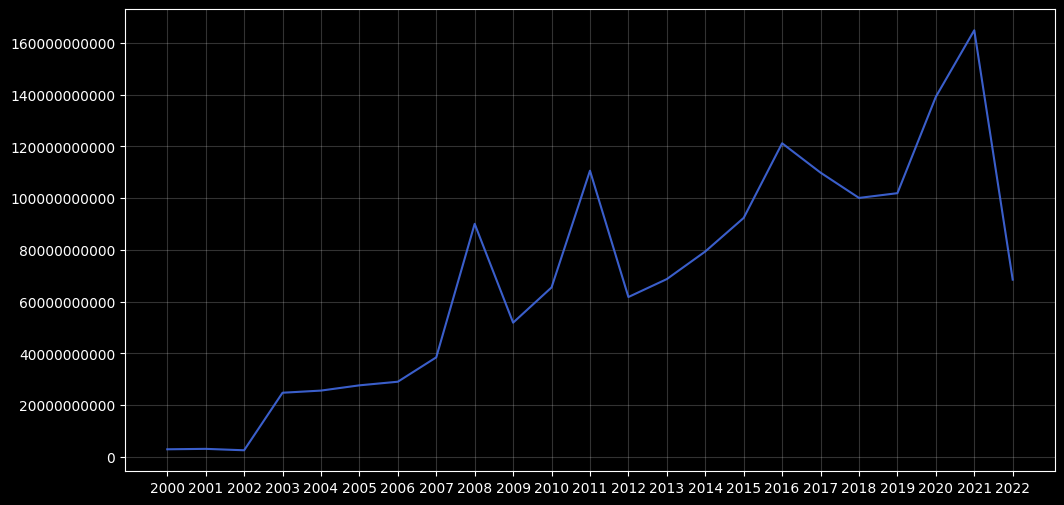

In [303]:
my_object12 = CashFlow(cashAtEndOfPeriod).DataSeparator(cashAtEndOfPeriod)
my_plot = Plot(x,y).bar_plot(my_object12[0],my_object12[1])
my_plot = Plot(x,y).line_plot(my_object12[0],my_object12[1])

#### There is a sudden drop on cash from 2021 to 2022.

The amount of cash the company had at the end of each period. A positive number indicates that the company had more cash at the end of the period, while a negative number indicates that the company had less cash. The overall trend of this data can give an indication of the company's financial position and its ability to generate cash over time. However, it is important to consider other factors such as the company's investments and debt obligations, as well as the overall economic conditions, to get a complete picture of the company's financial health.

## 13. CASH AT BEGINNING OF PERIOD

Cash at beginning of period refers to the amount of cash a company has at the start of a specific financial period, such as a fiscal quarter or year. This information is typically found in the cash flow statement and is used to help understand a company's financial health and ability to generate cash over time.

In [307]:
cashAtBeginningOfPeriod = cash_flow_statement_annually.iloc[32]
cashAtBeginningOfPeriod.sort_index(ascending=True, inplace=True)
cashAtBeginningOfPeriod 

2000      3146876600
2001     -6550289400
2002      3094902530
2003     28443678640
2004     24764647600
2005     25709157000
2006     27577000000
2007     29040000000
2008     38459000000
2009     90035000000
2010     51857000000
2011     65467000000
2012    110573000000
2013     61763000000
2014     68692000000
2015     79349000000
2016     92328000000
2017    121161000000
2018    109815000000
2019    100047000000
2020    101879000000
2021    139112000000
2022    164818000000
Name: cashAtBeginningOfPeriod, dtype: object

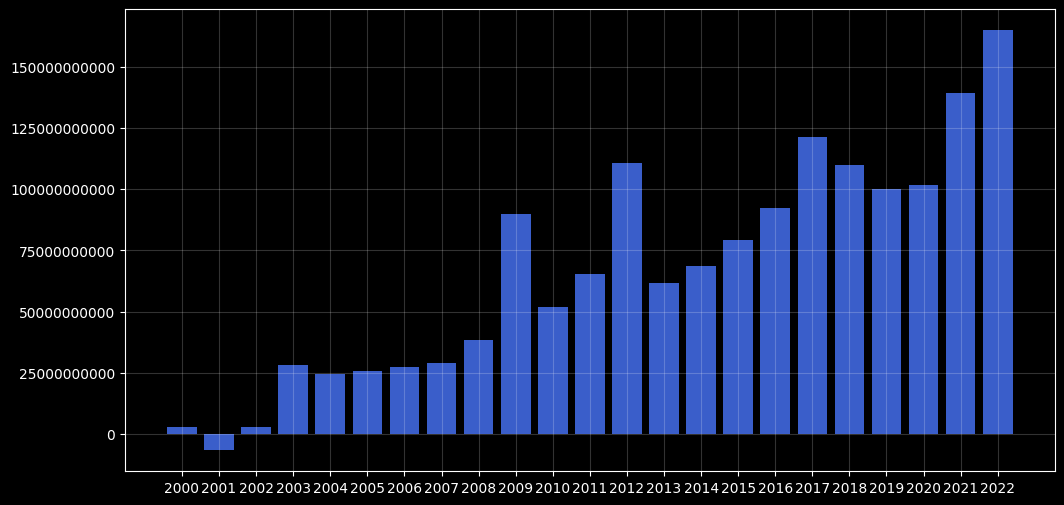

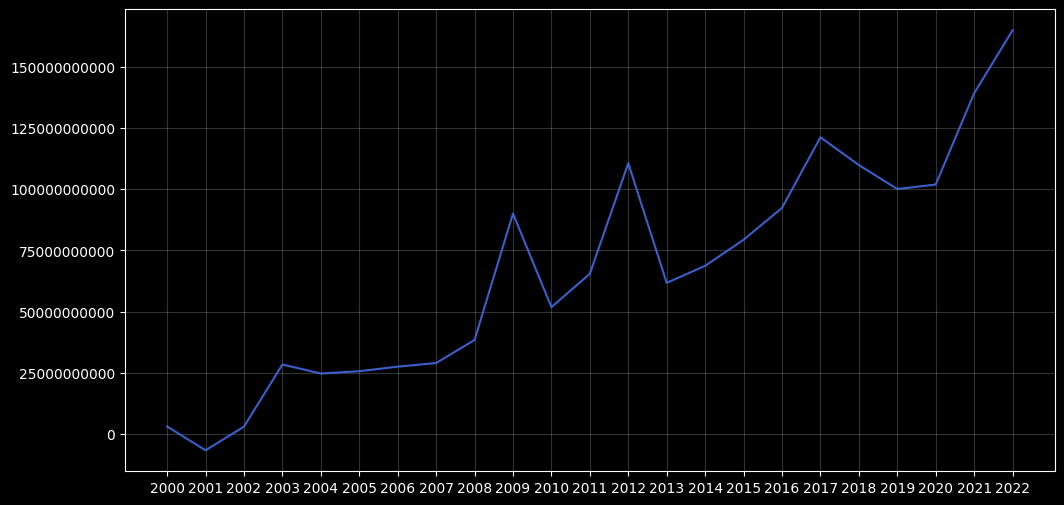

In [308]:
my_object13 = CashFlow(cashAtBeginningOfPeriod).DataSeparator(cashAtBeginningOfPeriod)
my_plot = Plot(x,y).bar_plot(my_object13[0],my_object13[1])
my_plot = Plot(x,y).line_plot(my_object13[0],my_object13[1])

The amount of cash that the company had at the beginning and end of each period. The positive values indicate that the company had an increase in cash, while the negative values indicate a decrease in cash.

#### It is showing linear trend and increasing with respect to time.

## 14. OPERATING CASH FLOW

Operating cash flow refers to the amount of cash generated or used by a company from its normal business operations, such as selling goods or services, producing products, and paying expenses. It is an important metric for investors and analysts to evaluate a company's financial performance, as it indicates the company's ability to generate cash from its operations and pay its bills. A positive operating cash flow indicates that the company is generating enough cash to cover its operating expenses, while a negative operating cash flow may indicate financial difficulties and the need for additional funding.

In [312]:
operatingCashFlow = cash_flow_statement_annually.iloc[33]
operatingCashFlow.sort_index(ascending=True, inplace=True)
operatingCashFlow 

2000    -50204486600
2001      4385701380
2002     57545282370
2003    -11289986760
2004    -47261491200
2005    -21027222000
2006    -48545000000
2007    -57893000000
2008    129871000000
2009    -14186000000
2010      8228000000
2011     38630000000
2012    -12674000000
2013     22074000000
2014    -17620000000
2015     15068000000
2016     26775000000
2017     -8542000000
2018     12760000000
2019    -18424000000
2020     -6514000000
2021     36938000000
2022     13820000000
Name: operatingCashFlow, dtype: object

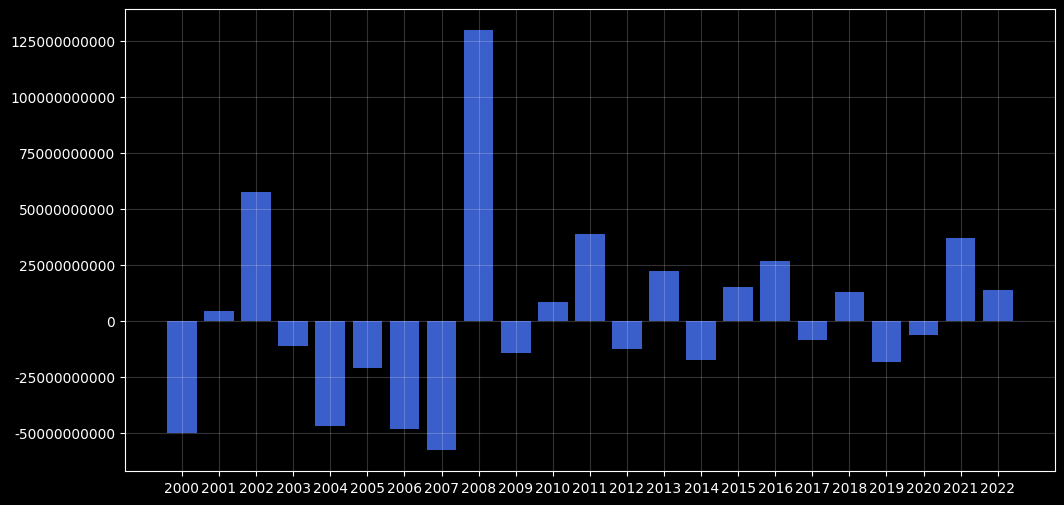

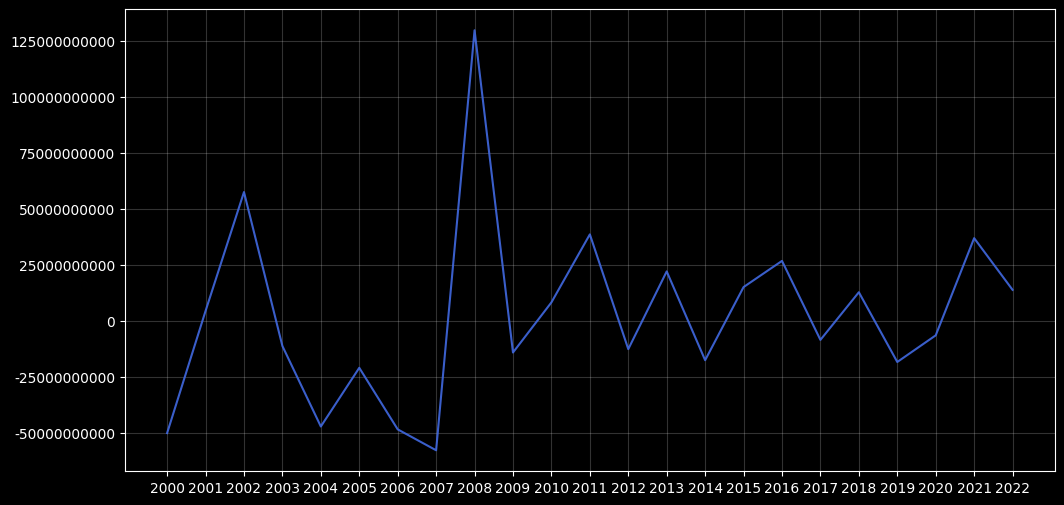

In [313]:
my_object14 = CashFlow(operatingCashFlow).DataSeparator(operatingCashFlow)
my_plot = Plot(x,y).bar_plot(my_object14[0],my_object14[1])
my_plot = Plot(x,y).line_plot(my_object14[0],my_object14[1])

The operational cash flow shows the amount of money the company is generating or losing from its day-to-day operations. Positive numbers would mean that the company is earning more money from its operations than it is spending, while negative numbers would mean that the company is spending more money than it is earning from its operations.

2021 VALUES ARE 36938000000 AND 2022 VALUES ARE 13820000000. THESE VALUES ARE POSITIVE.

## 15. CAPITAL EXPENDITURE

In [317]:
capitalExpenditure = cash_flow_statement_annually.iloc[34]
capitalExpenditure.sort_index(ascending=True, inplace=True)
capitalExpenditure 

2000    -3879422900
2001     -134663310
2002    -1678075780
2003     -882281920
2004     -992591600
2005    -1085208000
2006    -1530000000
2007    -1550000000
2008    -1473000000
2009    -1387000000
2010    -1689000000
2011    -1739000000
2012    -1242000000
2013     -903000000
2014    -1056000000
2015    -1102000000
2016    -1164000000
2017    -1068000000
2018    -1095000000
2019    -1293000000
2020    -1188000000
2021    -1419000000
2022    -1438000000
Name: capitalExpenditure, dtype: object

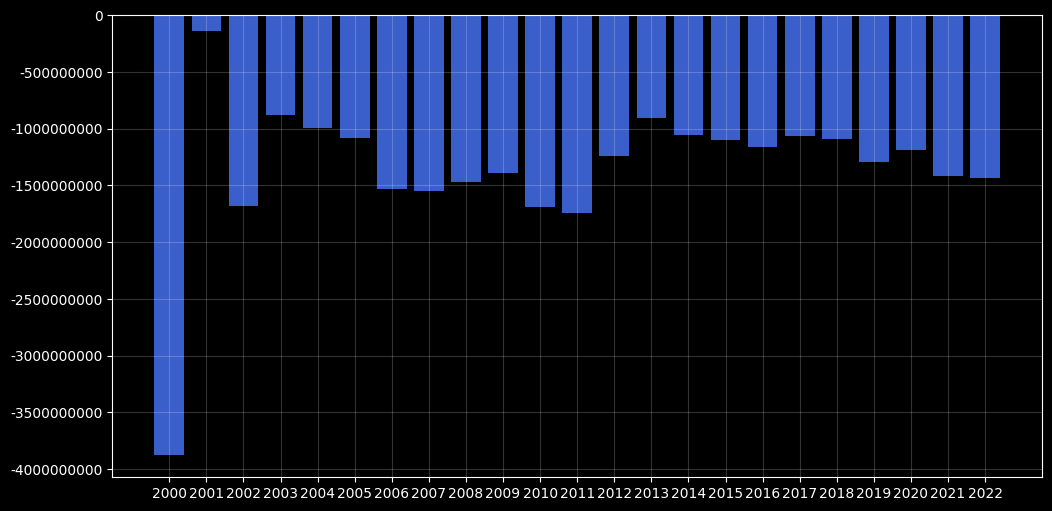

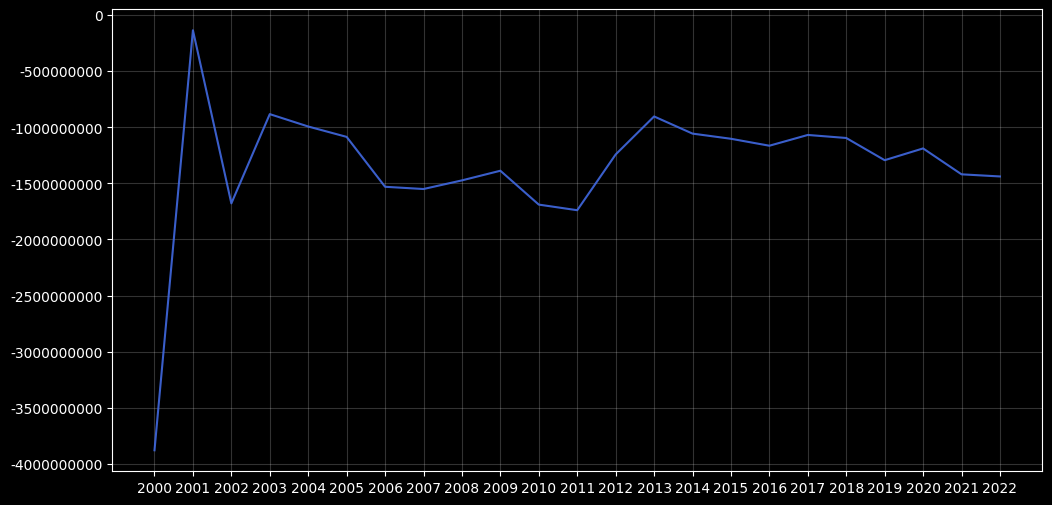

In [319]:
my_object15 = CashFlow(capitalExpenditure).DataSeparator(capitalExpenditure)
my_plot = Plot(x,y).bar_plot(my_object15[0],my_object15[1])
my_plot = Plot(x,y).line_plot(my_object15[0],my_object15[1])

Capital expenditures refer to investments in long-term assets such as property, plant, and equipment.

A negative number in a particular year means that the company spent more money on capital expenditures than it received from other sources. On the other hand, a positive number means that the company received more money from other sources than it spent on capital expenditures.

In the year 2000, the company spent -3879422900 on capital expenditures. In 2001, the figure decreased to -134663310. In 2002, the company spent -1678075780 on capital expenditures. The figure fluctuated in the following years with a significant decrease in 2005, where the company spent -1085208000. In the year 2022, the company spent -1438000000 on capital expenditures.


## 16. FREE CASH FLOW

Free cash flow is a measure of a company's financial performance that represents the amount of cash available for distribution after accounting for capital expenditures. It is calculated as operating cash flow minus capital expenditures. It is a useful metric for investors to assess a company's ability to generate cash after accounting for necessary investments in its operations. A positive free cash flow indicates that a company has cash available for paying dividends, repurchasing shares, paying off debt, or acquiring other businesses.

In [322]:
freeCashFlow = cash_flow_statement_annually.iloc[35]
freeCashFlow.sort_index(ascending=True, inplace=True)
freeCashFlow

2000    -54083909500
2001      4251038070
2002     55867206590
2003    -12172268680
2004    -48254082800
2005    -22112430000
2006    -50075000000
2007    -59443000000
2008    128398000000
2009    -15573000000
2010      6539000000
2011     36891000000
2012    -13916000000
2013     21171000000
2014    -18676000000
2015     13966000000
2016     25611000000
2017     -9610000000
2018     11665000000
2019    -19717000000
2020     -7702000000
2021     35519000000
2022     12382000000
Name: freeCashFlow, dtype: object

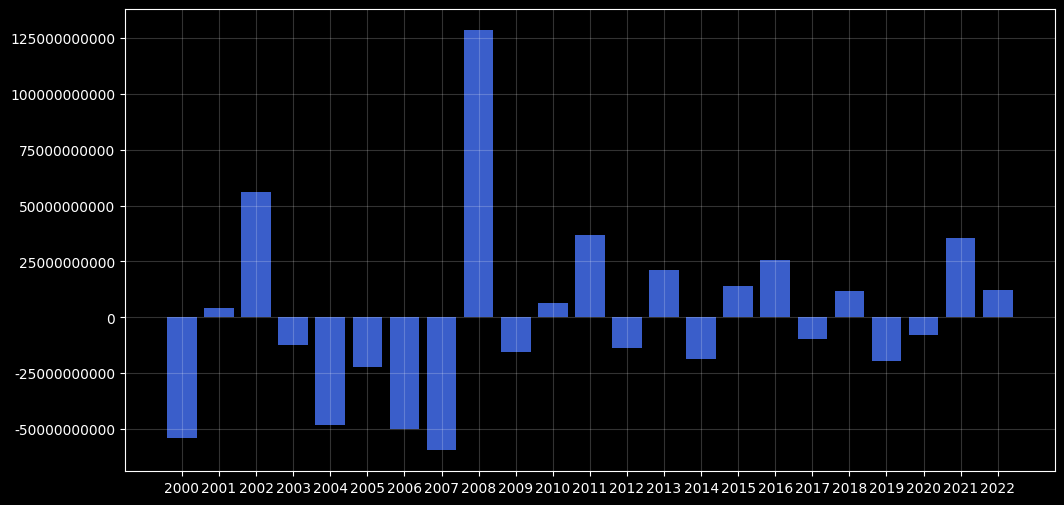

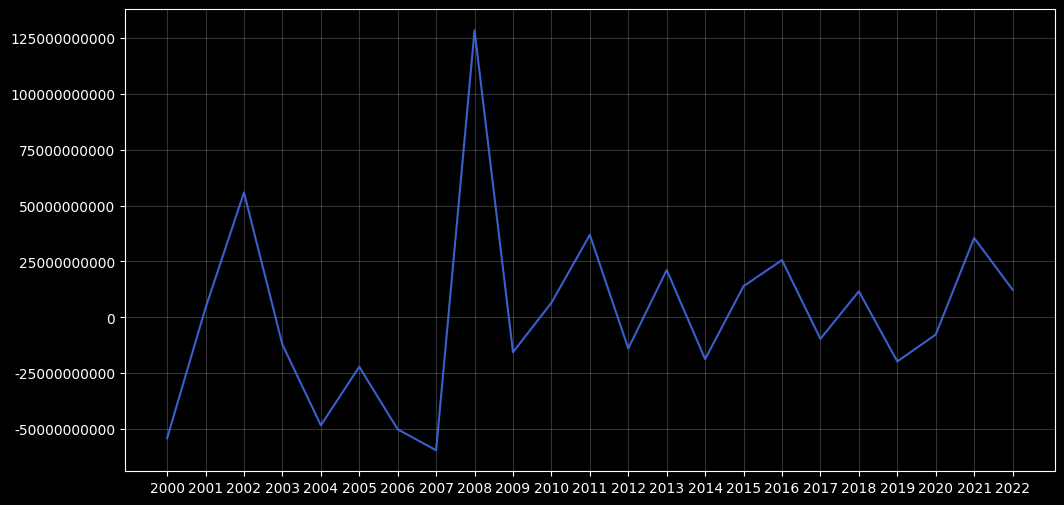

In [323]:
my_object16 = CashFlow(freeCashFlow).DataSeparator(freeCashFlow)
my_plot = Plot(x,y).bar_plot(my_object16[0],my_object16[1])
my_plot = Plot(x,y).line_plot(my_object16[0],my_object16[1])

A negative FCF in a particular year indicates that the company spent more on capital expenditures than it generated from its operations, while a positive FCF indicates that the company generated more cash from its operations than it spent on capital expenditures.

The year 2000, the company had a negative FCF of -54083909500, meaning it spent more on capital expenditures than it generated from its operations. However, in the year 2008, the company had a positive FCF of 128398000000, indicating that it generated more cash from its operations than it spent on capital expenditures.